# Pruebas de permutación

El objetivo del experimento es conocer cual de los dos sitios web imaginarios funciona mejor con potenciales clientes seleccionados al azar

In [250]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

La probabilidad de conversión para el sitio A es de 0.5, la probabilidad para el sitio B es de 0.6, vamos a intentar establecer si son iguales o el B demuestra ser mejor.

Se debe probar de cambiar las probabilidades, y el tamaño de la muestra. Diferencias pequeñas en las probabilidades con tamaños de muestra pequeños no alcanzaran a demostrar que realmente las probabilidades no son iguales. 

In [258]:
prob_A = 0.55
prob_B = 0.6
samples = 10000
# 1000 visitas a la página A y 1000 visitas a la página B
exitos_A = np.random.binomial(1, prob_A, samples)
exitos_B = np.random.binomial(1, prob_B, samples)

Hipotesis nula = "El sitio A y B son iguales"</BR>
Hipotesis alternativa = "El sitio B es mejor"</BR>
(Se aplica bidireccional solo por ser mas conservador)

In [259]:
diff = np.sum(exitos_B) - np.sum(exitos_A)
print("A: {} -> B: {} -> diff: {}".format(np.sum(exitos_A), np.sum(exitos_B), diff))

A: 5588 -> B: 5988 -> diff: 400


Tenemos una diferencia de 32, el sitio B parece ser mejor pero...¿esa diferencia es real o se debe al azar?

Metemos todos los datos en una única bolsa.

In [260]:
pagina = ['A'] * len(exitos_A) + ['B'] * len(exitos_B)
grupo = np.concatenate((exitos_A, exitos_B))  
df = pd.DataFrame({
    'Pagina': pagina,
    'exito': grupo,
    
})


Obtengo dos muestras sin reposicion...calculo la tasa de exitos y las diferencias. La media de las diferencias tendra distribución normal por el teorema del límite central. Almaceno las medias.

In [261]:
vals = []

for i in range(1000): 
    df_sample_1 = df.sample(n=samples, replace=False)
    df_sample_2 = df.drop(df_sample_1.index)
    vals.append(np.sum(df_sample_2["exito"])-np.sum(df_sample_1["exito"]))


Grafico para visualizar los resultados. Tambien obtengo el valor de p para tener una referencia numérica

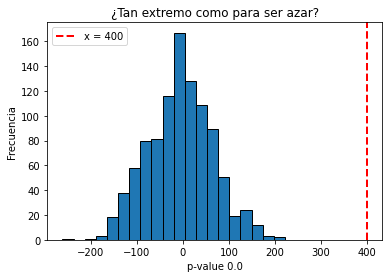

In [262]:
p_value = np.mean(vals >= diff)
plt.hist(vals, bins=20, edgecolor='black')
plt.axvline(x=diff, color='red', linestyle='--', linewidth=2, label=f'x = {diff}')
# Añadir etiquetas y leyenda
plt.xlabel('p-value {:.2}'.format(p_value)) 
plt.ylabel('Frecuencia')
plt.title('¿Tan extremo como para ser azar?')
plt.legend()

plt.show()

In [256]:
diff 

18